# Superstore Sales Exploratory Data Analysis
The retail dataset of a global superstore for 4 years is to be cleaned and explored using univariate and bivariate analysis methods. 

The Data Exploration will be done in a sequential manner according to the columns and the column data shall be matched with Sales data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('superstore_sales.csv')
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID   
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520  \
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State   
0      Claire Gute   Consumer  United States        Henderson    Kentucky  \
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category   
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases  \
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [3]:
# Investigating primary columns relating to a superstore in the dataset

print('Dataset Shape: ', data.shape)
print()
print('Dataset columns: ', data.columns)
print()
print('Unique Order IDs:', data['Order ID'].unique().shape[0])
print()
print('Unique Customer IDs:', data['Customer ID'].unique().shape[0])
print()
print('Unique Product IDs:', data['Product ID'].unique().shape[0])

Dataset Shape:  (9800, 18)

Dataset columns:  Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Unique Order IDs: 4922

Unique Customer IDs: 793

Unique Product IDs: 1861


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Checking for duplicate values
data.duplicated().sum()

0

In [6]:
# deleting extra unwanted columns
del data['Row ID']
del data['Postal Code']
del data['Product ID']

In [7]:
# Checking for nulls
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

# Sales Descriptive Statistics

In [8]:
print("Mean Sales Value:", data['Sales'].mean())
print("Median Sales Value:", data['Sales'].median())
print("Standard Deviation of Sales Value:", data['Sales'].std())
print("Minimum Sales Value:", data['Sales'].min())
print("Maximum Sales Value:",data['Sales'].max())


Mean Sales Value: 230.7690594591837
Median Sales Value: 54.489999999999995
Standard Deviation of Sales Value: 626.6518748388042
Minimum Sales Value: 0.444
Maximum Sales Value: 22638.48


# Order Date and Ship Date

In [9]:
# Converting the data columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

In [10]:
# Converting the data columns to datetime format
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [11]:
print(data['Order Date'].info())
print(data['Ship Date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Ship Date
Non-Null Count  Dtype         
--------------  -----         
9800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB
None


In [12]:
# Creating a new column to find the difference between Order Date and Delivery Date

data['DateDifference'] = (data['Ship Date'] - data['Order Date']).dt.days
data.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID   
0  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520  \
1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State   
0      Claire Gute   Consumer  United States        Henderson    Kentucky  \
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category   
0  South        Furniture    Bookcases  \
1  South        Furniture       Chairs   
2   West  Office Supplies       Labels   
3  South        Furniture       Tables   
4  South  Office Supplies      Storage   

                                        Product Name     Sales  DateDifference  
0                  Bush Somerset Collection Bookcase  261.9600               3  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400               3  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200               4  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775               7  
4                     Eldon Fold 'N Roll Cart System   22.3680               7

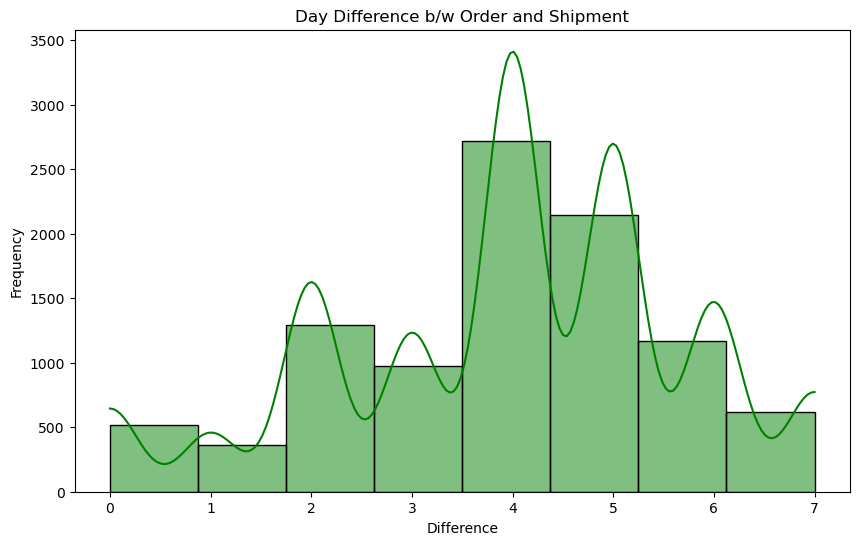

In [15]:
#Visualisation of the Date Difference
plt.figure(figsize=(10, 6))
sns.histplot(data['DateDifference'], kde=True, color='green', bins=8)
plt.title('Day Difference b/w Order and Shipment')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.show()

From the above histogram, we can infer that it takes mostly 4-5 processing days after the order has been made for it to be sent out for delivery.

In [13]:
# Date Differences grouped by the Shipping Mode
data.groupby('Ship Mode')['DateDifference'].value_counts()

Ship Mode       DateDifference
First Class     3                  605
                2                  557
                1                  338
                4                    1
Same Day        0                  514
                1                   24
Second Class    2                  738
                5                  423
                3                  372
                4                  368
                1                    1
Standard Class  4                 2349
                5                 1724
                6                 1170
                7                  615
                3                    1
Name: count, dtype: int64

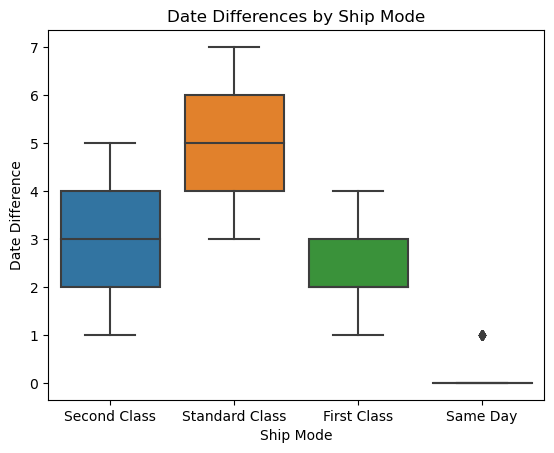

In [14]:
# Visualisation of the Date Differences grouped by the Shipping Mode

sns.boxplot(x='Ship Mode', y='DateDifference', data=data)
plt.title('Date Differences by Ship Mode')
plt.ylabel('Date Difference')
plt.xlabel('Ship Mode')

plt.show()

From the above box plots, we can infer that most customers opt for standard shipping that usually takes about 4-6 days of processing. Same day shipping is the least preferred option and it can also be influenced by geographical factors of the superstore.

### Creating additional date related columns for analysis

In [16]:
#Creating Weekday, Month, Year and YearMonth columns for ORDER DATE

data['OrderWeekday'] = data['Order Date'].dt.day_name()
data['OrderMonth'] = data['Order Date'].dt.month
data['OrderYear'] = data['Order Date'].dt.year
data['OrderYearMonth'] = data['Order Date'].apply(lambda x: x.strftime('%Y%m'))

In [17]:
data.head(3)

Order ID Order Date  Ship Date     Ship Mode Customer ID   
0  CA-2017-152156 2017-11-08 2017-11-11  Second Class    CG-12520  \
1  CA-2017-152156 2017-11-08 2017-11-11  Second Class    CG-12520   
2  CA-2017-138688 2017-06-12 2017-06-16  Second Class    DV-13045   

     Customer Name    Segment        Country         City       State Region   
0      Claire Gute   Consumer  United States    Henderson    Kentucky  South  \
1      Claire Gute   Consumer  United States    Henderson    Kentucky  South   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   West   

          Category Sub-Category   
0        Furniture    Bookcases  \
1        Furniture       Chairs   
2  Office Supplies       Labels   

                                        Product Name   Sales  DateDifference   
0                  Bush Somerset Collection Bookcase  261.96               3  \
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94               3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62               4   

  OrderWeekday  OrderMonth  OrderYear OrderYearMonth  
0    Wednesday          11       2017         201711  
1    Wednesday          11       2017         201711  
2       Monday           6       2017         201706

In [18]:
print('Orders By Weekday Count', data['OrderWeekday'].value_counts())
print()
print('Orders By Monthly Count', data['OrderMonth'].value_counts())
print()
print('Orders By Yearly Count', data['OrderYear'].value_counts())

Orders By Weekday Count OrderWeekday
Tuesday      1889
Saturday     1786
Sunday       1695
Monday       1593
Wednesday    1229
Friday       1067
Thursday      541
Name: count, dtype: int64

Orders By Monthly Count OrderMonth
11    1449
12    1382
9     1354
10     809
5      725
7      697
8      693
6      691
3      680
4      657
1      366
2      297
Name: count, dtype: int64

Orders By Yearly Count OrderYear
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64


Text(0.5, 1.0, 'Order Occurrences by Year Month')

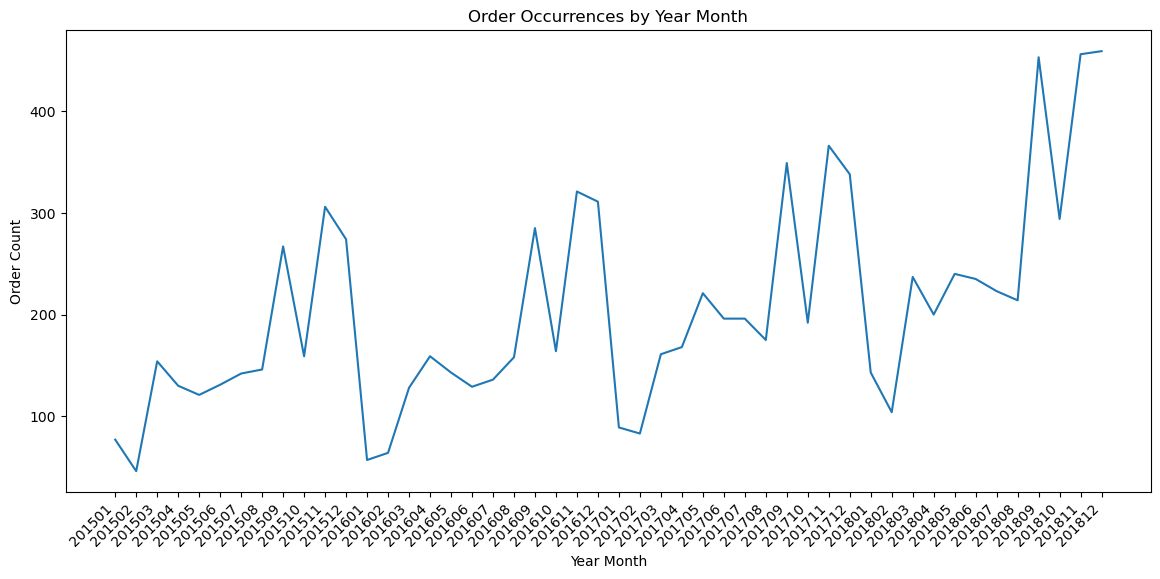

In [19]:
# Line Plot Visualisation of Order Occurence by Year Month
plt.figure(figsize=(14, 6))
sns.lineplot(data=data['OrderYearMonth'].value_counts().sort_index())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Month')
plt.ylabel('Order Count')
plt.title('Order Occurrences by Year Month')

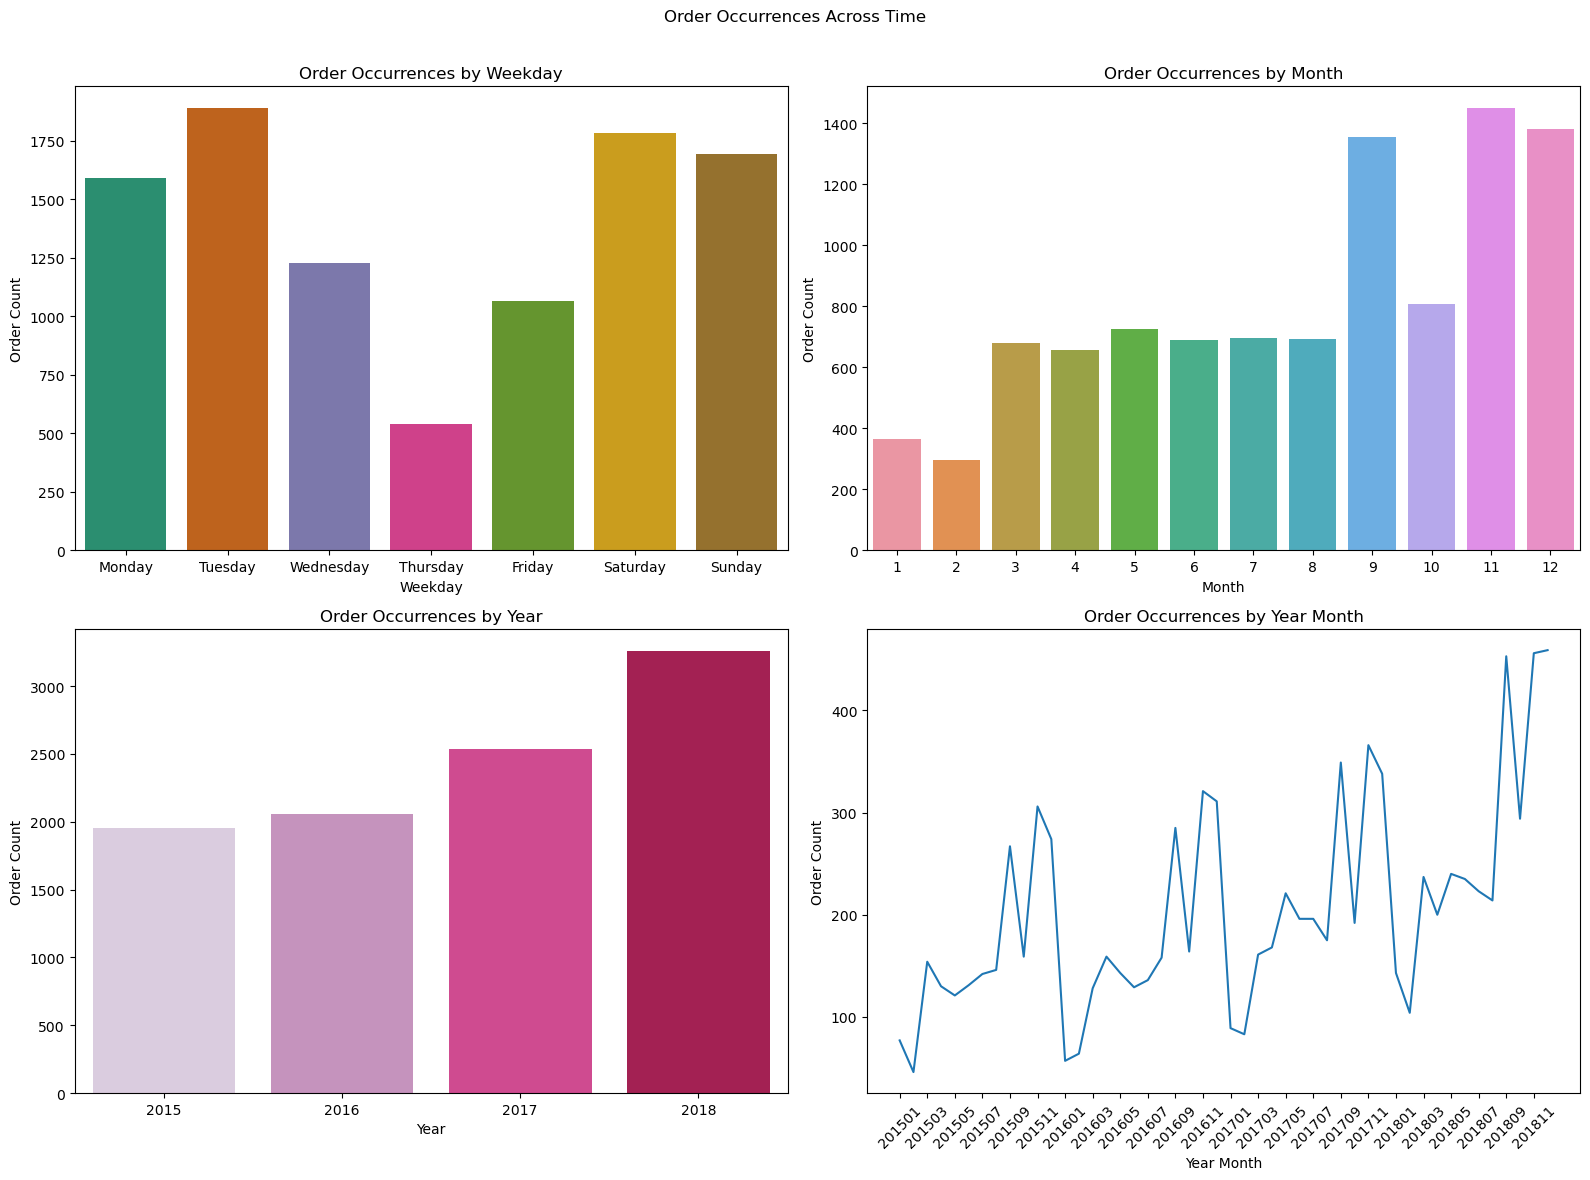

In [20]:
# Visualisations of Order Ocuurences over time across different created columns

# Setting up the subplots to put all the orders across time data into charts

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Order Occurrences Across Time')

# 1. Order Occurrences by Weekday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday']

sns.countplot(x='OrderWeekday', data=data, order=order, ax=axes[0, 0], palette='Dark2')
axes[0, 0].set_title('Order Occurrences by Weekday')
axes[0, 0].set_xlabel('Weekday')
axes[0, 0].set_ylabel('Order Count')

# 2. Order Occurrences by Month
sns.countplot(x='OrderMonth', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Order Occurrences by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Order Count')

# 3. Order Occurrences by Year
sns.countplot(x='OrderYear', data=data, ax=axes[1, 0], palette='PuRd')
axes[1, 0].set_title('Order Occurrences by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Order Count')

# 4. Order Occurrences by Year Month
sns.lineplot(data=data['OrderYearMonth'].value_counts().sort_index(), ax=axes[1, 1])
axes[1, 1].set_xticks(axes[1, 1].get_xticks()[::2])  # will show every second x-tick for better readability
axes[1, 1].tick_params(axis='x', rotation=45, labelright=True)
axes[1, 1].set_xlabel('Year Month')
axes[1, 1].set_ylabel('Order Count')
axes[1, 1].set_title('Order Occurrences by Year Month')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

1. **Order Occurrences by Weekday**: Most orders are made on tuesdays, followed by saturdays and sundays. Thurdays witnesses the least amount of orders made.
2. **Order Occurrences by Month**: The beginning of the year witnesses low amount or orders made and the number steadily rises as it peaks in the year-end holiday season influenced by Thanksgiving and Christmas.
3. **Order Occurrences by Year**: The orders made have steadily increased from 2015 to 2017 and jumped to a new high in 2018.
4. **Order Occurrences by YearMonth**: The line plot shows a similar pattern as depicted in the monthly and yearly bar graphs with overall steady increases, dips in the first two months and peaks in the year-end holiday months.

In [ ]:
## Creating Weekday, Month, Year and YearMonth columns for SHIPMENT DATE

In [21]:
data['ShipmentMonth'] = data['Ship Date'].dt.month
data['ShipmentWeekday'] = data['Ship Date'].dt.day_name()

In [22]:
print('Shipment By Weekday Count', data['ShipmentWeekday'].value_counts())
print()
print('Shipment By Monthly Count', data['ShipmentMonth'].value_counts())

Shipment By Weekday Count ShipmentWeekday
Thursday     1565
Saturday     1498
Sunday       1474
Wednesday    1433
Friday       1420
Monday       1236
Tuesday      1174
Name: count, dtype: int64

Shipment By Monthly Count ShipmentMonth
11    1414
12    1384
9     1337
10     811
6      740
7      707
5      684
8      660
4      641
3      634
1      464
2      324
Name: count, dtype: int64


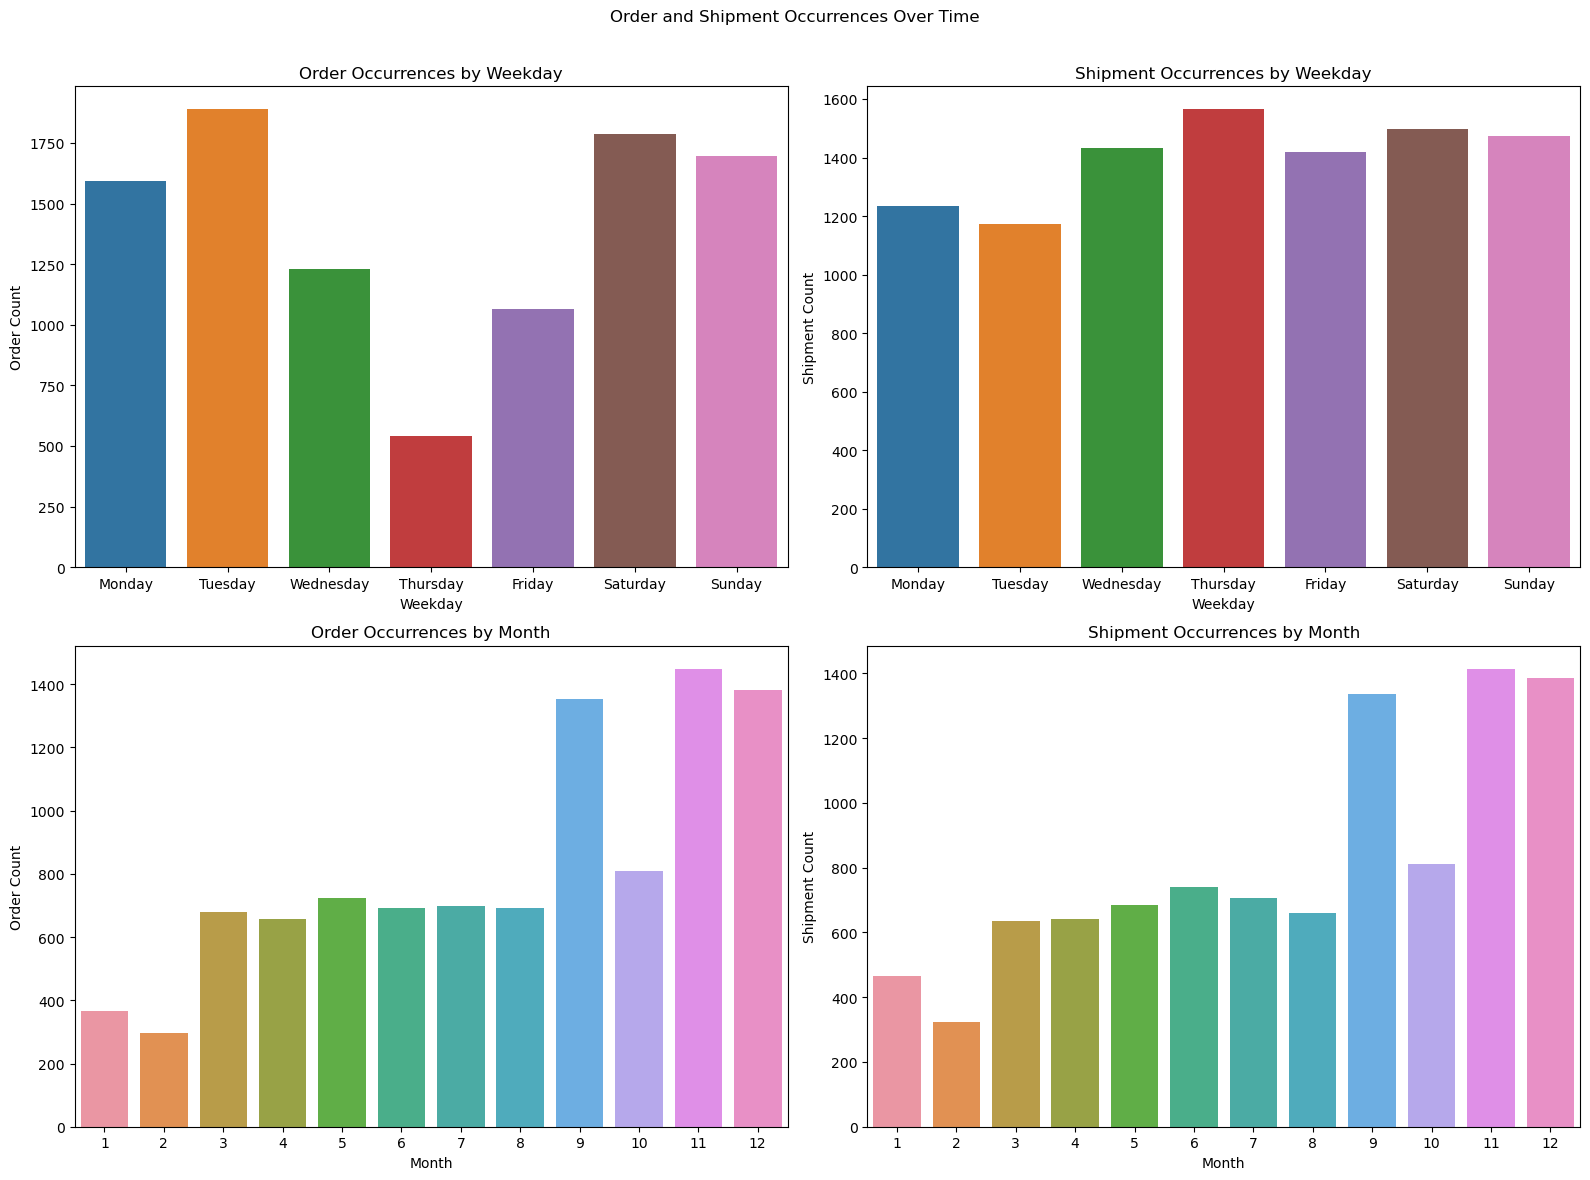

In [23]:
# Seting up subplots to compare order data and shipping data 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Order and Shipment Occurrences Over Time')

# 1. Order Occurrences by Weekday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday']

sns.countplot(x='OrderWeekday', data=data, order=order, ax=axes[0, 0])
axes[0, 0].set_title('Order Occurrences by Weekday')
axes[0, 0].set_xlabel('Weekday')
axes[0, 0].set_ylabel('Order Count')

# 2. Shipment Occurrences by Weekday
sns.countplot(x='ShipmentWeekday', data=data, order=order, ax=axes[0, 1])
axes[0, 1].set_title('Shipment Occurrences by Weekday')
axes[0, 1].set_xlabel('Weekday')
axes[0, 1].set_ylabel('Shipment Count')

# 3. Order Occurrences by Year with different color palette
sns.countplot(x='OrderMonth', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Order Occurrences by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Order Count')

# 4. Shipment Occurrences by Month
sns.countplot(x='ShipmentMonth', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Shipment Occurrences by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Shipment Count')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Comparing Order and Shipment data
1. **Order Occurrences by Weekday**: Most orders are made on tuesdays, followed by saturdays and sundays. Thurdays witnesses the least amount of orders made.
2. **Shipment Occurrences by Weekday**: Shipping days, when compared to order days are relatively stable with minor lows on Mondays and Tuesdays and a slight peak on Thursdays.
3. **Order Occurrences by Month**: The beginning of the year witnesses low amount or orders made and the number steadily rises as it peaks in the year-end holiday season influenced by Thanksgiving and Christmas.
4. **Shipment Occurrences by Month**: The shipment data is similar to that of the order data. considering it takes about 4-6 days to process an order, this overlap is expected.


### Sales Across Time

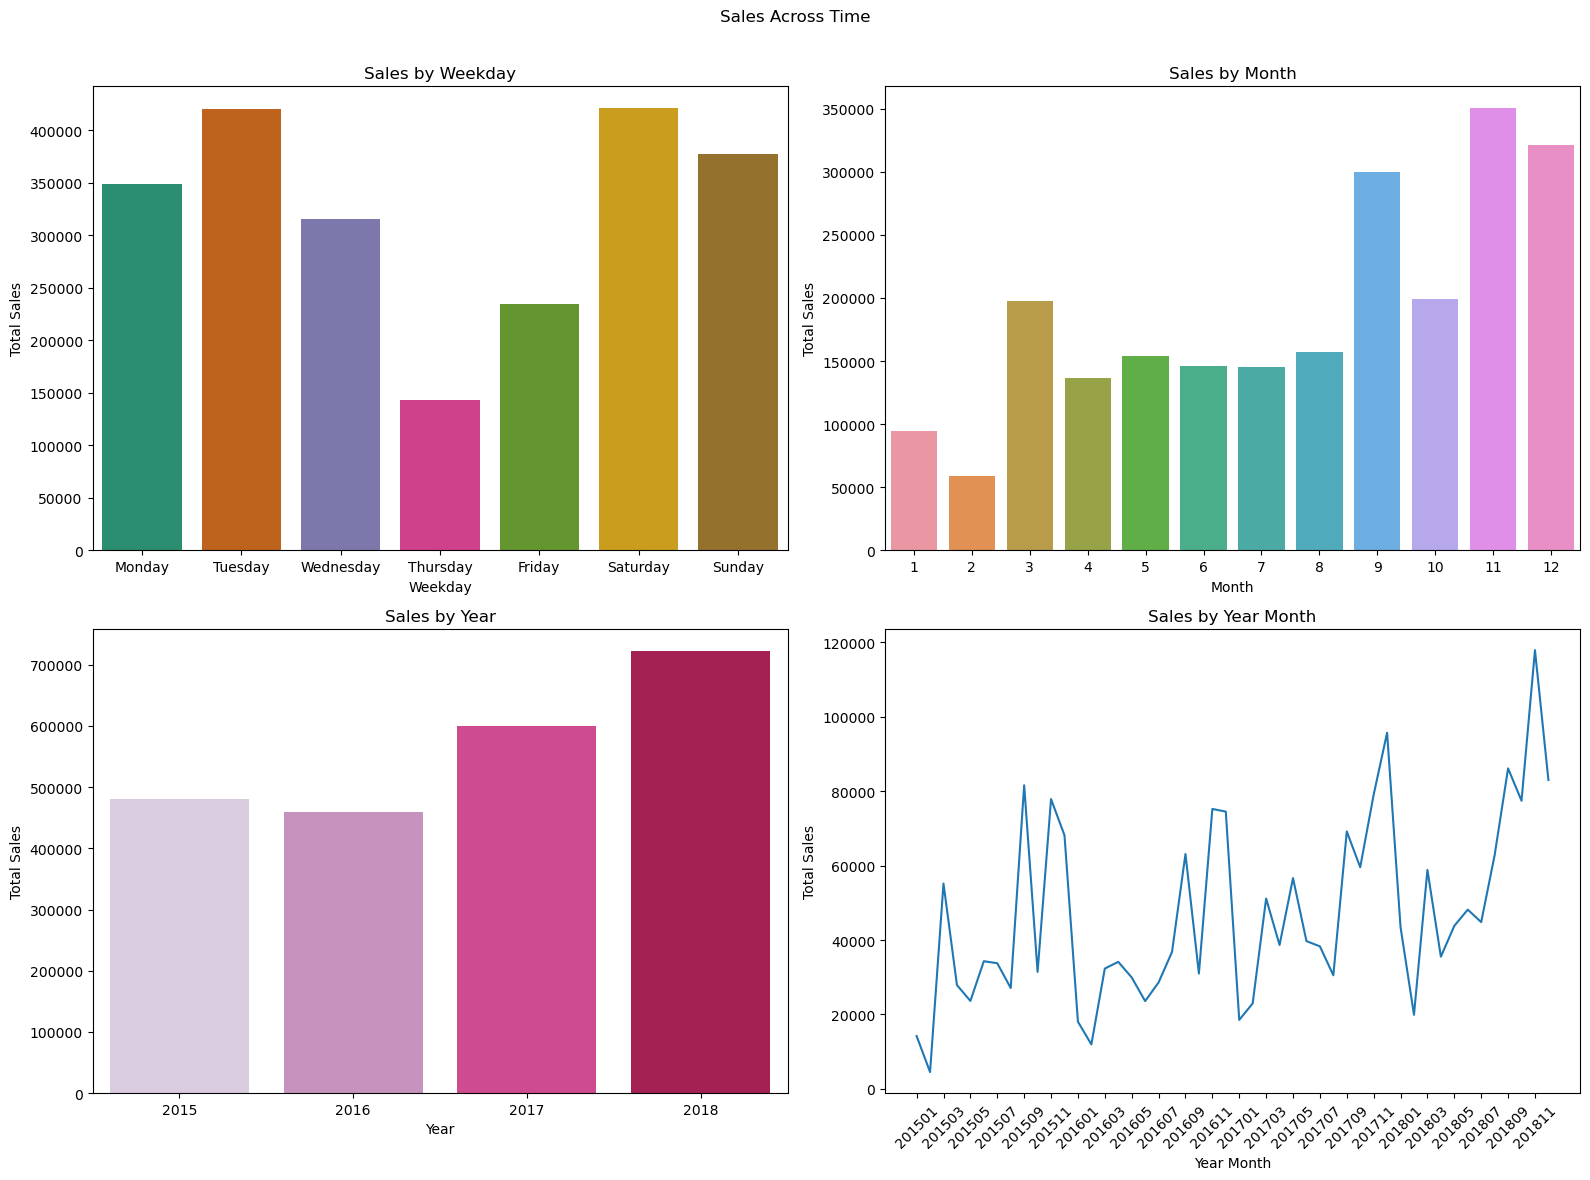

In [25]:
# Setting up the subplots to put all the sales across time data into charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Sales Across Time')

# 1. Sales by Weekday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday']

sns.barplot(x='OrderWeekday', y='Sales', data=data, order=order, ax=axes[0, 0], 
            palette='Dark2', estimator=sum, errorbar=None)
axes[0, 0].set_title('Sales by Weekday')
axes[0, 0].set_xlabel('Weekday')
axes[0, 0].set_ylabel('Total Sales')

# 2. Sales by Month
sns.barplot(x='OrderMonth', y='Sales', data=data, ax=axes[0, 1], estimator=sum, errorbar=None)
axes[0, 1].set_title('Sales by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Sales')

# 3. Sales by Year
sns.barplot(x='OrderYear', y='Sales', data=data, ax=axes[1, 0], palette='PuRd', estimator=sum, errorbar=None)
axes[1, 0].set_title('Sales by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Total Sales')

# 4. Sales by Year Month
sns.lineplot(data=data.groupby('OrderYearMonth')['Sales'].sum().reset_index(), 
             x='OrderYearMonth', y='Sales', ax=axes[1, 1])
axes[1, 1].set_xticks(axes[1, 1].get_xticks()[::2])  
axes[1, 1].tick_params(axis='x', rotation=45, labelright=True)
axes[1, 1].set_xlabel('Year Month')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].set_title('Sales by Year Month')

plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()


While all of the graphs here align with the interpretation used in the Order Data Over Time subplots, a minor change is observed in the *Sales by Year* chart when compared to *Orders by Year* earlier. In 2016, the sales slightly dip whereas the orders continued increasing. This suggests a dip in sales of high value items.

# Customer Details

In [26]:
print('Data Shape:', data.shape)
print('Unique Order ID:', data['Order ID'].unique().shape[0])
print('Unique Customers:', data['Customer ID'].unique().shape[0])

Data Shape: (9800, 22)
Unique Order ID: 4922
Unique Customers: 793


### Finding our Top 10 customers contributing to sales

In [28]:

customer_sales = data.groupby('Customer Name')['Sales'].sum().reset_index()

customer_sales.sort_values(by='Sales', ascending=False).head(10)

Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072

### Finding what category and subcategory of products are bought by the top 10 customers

In [29]:
# 1. Storing top customers into a variable
top_customers_data = customer_sales.sort_values(by='Sales', ascending=False).head(7)

# 2. Extracting the Customer Names
top_customer_ids = top_customers_data['Customer Name']

# 3. Filtering the original dataset based on the required customer names
filtered_data = data[data['Customer Name'].isin(top_customer_ids)]

# 4. Grouping the filtered dataset by category' and Sub-Category and using the count func
category_counts = filtered_data.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

category_counts

Category Sub-Category  Count
0         Furniture    Bookcases      1
1         Furniture       Chairs      4
2         Furniture  Furnishings     18
3         Furniture       Tables      2
4   Office Supplies   Appliances      3
5   Office Supplies          Art     12
6   Office Supplies      Binders     21
7   Office Supplies    Envelopes      4
8   Office Supplies    Fasteners      4
9   Office Supplies       Labels      3
10  Office Supplies        Paper     12
11  Office Supplies      Storage     12
12  Office Supplies     Supplies      3
13       Technology  Accessories      7
14       Technology      Copiers      3
15       Technology     Machines      3
16       Technology       Phones     14

In [30]:
# Creating a nested pie chart to visualise our findings
fig = px.sunburst(category_counts, path=['Category', 'Sub-Category'], values='Count',
                  title="Top Customers' Purchases by Category and Sub-Category")
fig.show()

When it comes to the top 10 customers contributing to the store's sales, Office Supply, Technology and Furniture respectively takes up the area of products. 

The major subcategories from each are Binders, Phones and Furnishings respectively.

Overall categorical distribution will be explored further down the file.

# Customer Segment

In [77]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

Text(0.5, 1.0, 'Customer Segment Distribution')

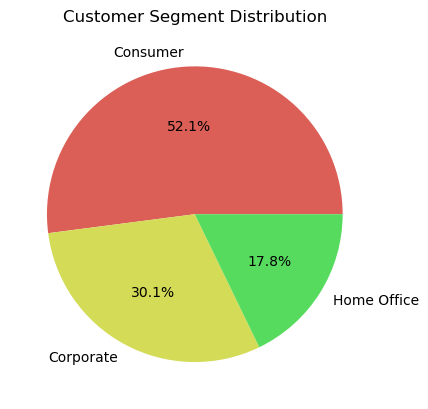

In [78]:
# Visualising Customer Segment data
ount_segment = data['Segment'].value_counts()

plt.pie(count_segment, labels= count_segment.index, autopct='%1.1f%%')
plt.title('Customer Segment Distribution')

More than half the customer segment is made up of individual consumers, followed by corporates and home offices

### Total Sales by the Segment

In [33]:
by_segment = data.groupby('Segment')

In [34]:
by_segment['Sales'].sum()

# 1.148061e+06 is equivalent to 1.148061 * 10^6, which is 1,148,061
# 6.884941e+05 is equivalent to 6.884941 * 10^5, which is 688,494.1
# 4.249822e+05 is equivalent to 4.249822 * 10^5, which is 424,982.2

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

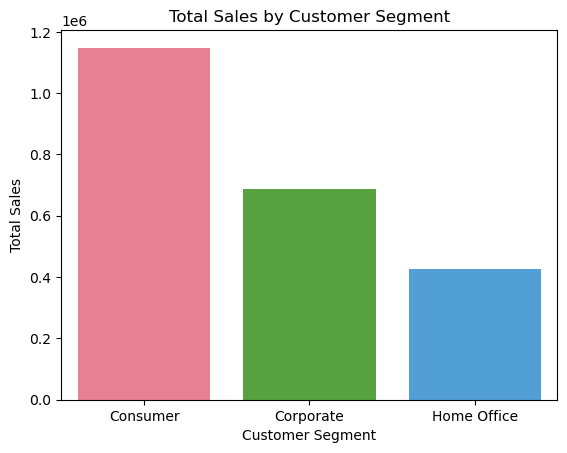

In [35]:
# Visualising our results

sales_by_segment = by_segment['Sales'].sum().reset_index()

sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='husl')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

In line with the categorical counts, consumers contribute highest to the sales followed by corporates and home offices.

# Country
Only one country in the dataset 

In [36]:
data['Country'].unique()

array(['United States'], dtype=object)

# State

In [37]:
data['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [38]:
# Number of states in the dataset
(data['State'].unique().shape[0])

49

### Sales by the States

In [39]:
by_state = data.groupby('State')

In [40]:
by_state['Sales'].sum() 

State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [41]:
sales_state = by_state['Sales'].sum().reset_index() 
sales_state.head()

State        Sales
0     Alabama   19510.6400
1     Arizona   35272.6570
2    Arkansas   11678.1300
3  California  446306.4635
4    Colorado   31841.5980

In [42]:
# Top 5 States in Sales
sales_state.sort_values(by='Sales', ascending=False).head()

State        Sales
3     California  446306.4635
30      New York  306361.1470
41         Texas  168572.5322
45    Washington  135206.8500
36  Pennsylvania  116276.6500

In [43]:
# Bottom 5 States in Sales
sales_state.sort_values(by='Sales', ascending=True).head()

State     Sales
32   North Dakota   919.910
46  West Virginia  1209.824
17          Maine  1270.530
39   South Dakota  1315.560
48        Wyoming  1603.136

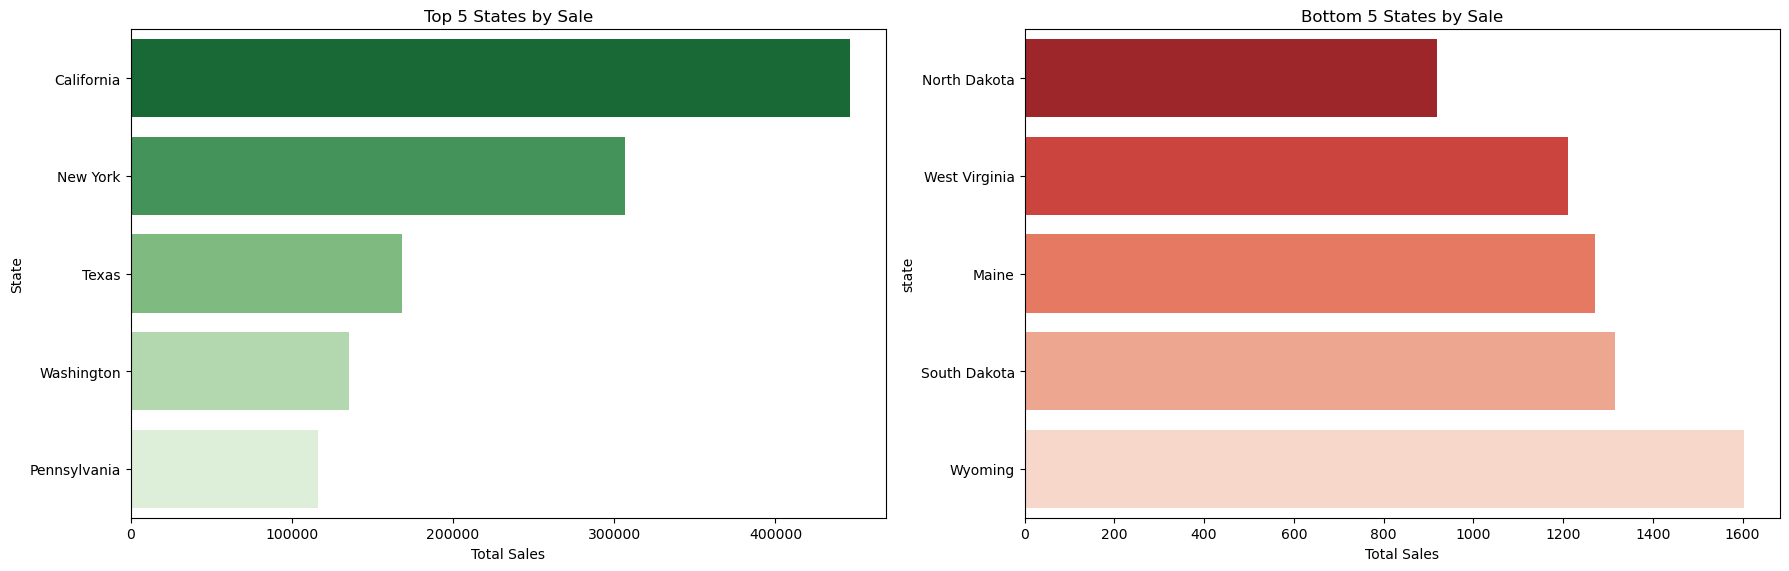

In [44]:
# Sorting the data for both top and bottom states

sales_state_top = sales_state.sort_values(by='Sales', ascending=False).head()
sales_state_bottom = sales_state.sort_values(by='Sales', ascending=True).head()

# Creating a visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top States (Green Hues)
sns.barplot(x='Sales', y='State', data=sales_state_top, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 5 States by Sale')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('State')

# Bottom States (Red Hues)
sns.barplot(x='Sales', y='State', data=sales_state_bottom, ax=axes[1], palette='Reds_r')
axes[1].set_title('Bottom 5 States by Sale')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('state')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Top 5 States by Sales:**
1. California
2. New York
3. Texas
4. Washington
5. Pennsylvania

**Bottom 5 States by Sales:**
1. North Dakota
2. West Virginia	
3. Maine	
4. South Dakota
5. Wyoming

# City

In [45]:
data["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [46]:
#number of cities
(data['City'].unique().shape[0])

529

### Sales by the Cities

In [47]:
by_city= data.groupby(['State', 'City'])

In [48]:
by_city['Sales'].sum()

State      City      
Alabama    Auburn        1766.830
           Decatur       3374.820
           Florence      1997.350
           Hoover         525.850
           Huntsville    2484.370
                           ...   
Wisconsin  Superior      1299.730
           Waukesha        54.500
           Wausau         317.480
           West Allis     250.480
Wyoming    Cheyenne      1603.136
Name: Sales, Length: 600, dtype: float64

In [49]:
sales_city = by_city['Sales'].sum().reset_index() 
sales_city

State        City     Sales
0      Alabama      Auburn  1766.830
1      Alabama     Decatur  3374.820
2      Alabama    Florence  1997.350
3      Alabama      Hoover   525.850
4      Alabama  Huntsville  2484.370
..         ...         ...       ...
595  Wisconsin    Superior  1299.730
596  Wisconsin    Waukesha    54.500
597  Wisconsin      Wausau   317.480
598  Wisconsin  West Allis   250.480
599    Wyoming    Cheyenne  1603.136

[600 rows x 3 columns]

In [50]:
# Top 5 City in Sales
sales_city.sort_values(by='Sales', ascending=False).head()

State           City       Sales
387      New York  New York City  252462.547
62     California    Los Angeles  173420.181
582    Washington        Seattle  116106.322
89     California  San Francisco  109041.120
460  Pennsylvania   Philadelphia  108841.749

In [51]:
# Bottom 5 City in Sales
sales_city.sort_values(by='Sales', ascending=True).head()

State          City  Sales
491    Texas       Abilene  1.392
423     Ohio        Elyria  1.824
153  Florida       Jupiter  2.064
165  Florida     Pensacola  2.214
162  Florida  Ormond Beach  2.808

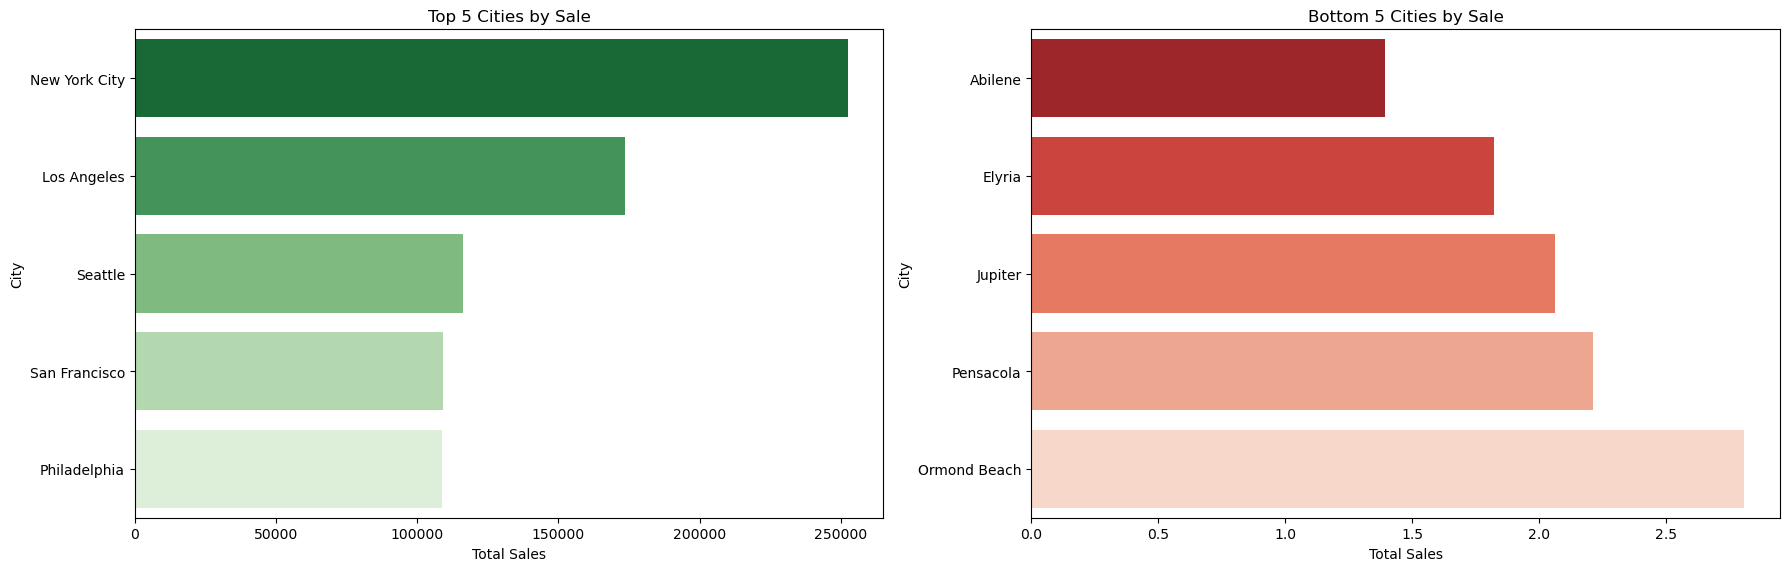

In [52]:
# Sorting the data for both top and bottom cities
sales_city_top = sales_city.sort_values(by='Sales', ascending=False).head()
sales_city_bottom = sales_city.sort_values(by='Sales', ascending=True).head()

# Creating a visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top Cities (Green Hues)
sns.barplot(x='Sales', y='City', data=sales_city_top, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 5 Cities by Sale')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

# Bottom Cities (Red Hues)
sns.barplot(x='Sales', y='City', data=sales_city_bottom, ax=axes[1], palette='Reds_r')
axes[1].set_title('Bottom 5 Cities by Sale')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('City')

# Adjusting the layout to avoid overlapping charts
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Top 5 Cities by Sales:**
1. New York City, New York
2. Los Angeles, California	
3. Seattle, Washington	
4. San Francisco, California
5. Philadelphia, Pennsylvania

**Bottom 5 Cities by Sales:**
1. Abilene, Texas
2. Elyria, Ohio	
3. Jupiter,  Florida	
4. Pensacola,  Florida
5. Ormond Beach,  Florida

# Region

In [53]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

### Sales by Region

In [54]:
by_region = data.groupby('Region')

In [55]:
by_region['Sales'].sum()

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

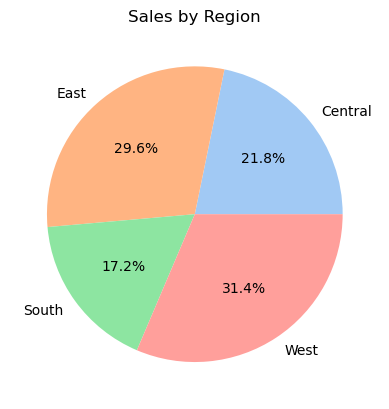

In [56]:
# Creating a visualisation
sales_by_region = by_region['Sales'].sum()

sns.set_palette("pastel")
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()

Sales by region is the greatest in the west, followed by the east, central and south.

### Sales by Regions and States

In [57]:
by_regionstate = data.groupby(['Region', 'State'])

In [58]:
by_regionstate['Sales'].sum()

Region   State               
Central  Illinois                 79236.5170
         Indiana                  48718.4000
         Iowa                      4443.5600
         Kansas                    2914.3100
         Michigan                 76136.0740
         Minnesota                29863.1500
         Missouri                 22205.1500
         Nebraska                  7464.9300
         North Dakota               919.9100
         Oklahoma                 19683.3900
         South Dakota              1315.5600
         Texas                   168572.5322
         Wisconsin                31173.4300
East     Connecticut              13384.3570
         Delaware                 27322.9990
         District of Columbia      2865.0200
         Maine                     1270.5300
         Maryland                 23705.5230
         Massachusetts            28634.4340
         New Hampshire             7292.5240
         New Jersey               34610.9720
         New York        

In [75]:
# Creating a visualisation

sales_regionstate = data.groupby(['Region', 'State'])['Sales'].sum().reset_index()

fig = px.bar(sales_regionstate, x='Region', y='Sales', color='State', title='Total Sales by Region and State')
fig.show()

Sales by region is the greatest in the west, followed by the east, central and south.

The major states from each region are California, New York, Texas and Florida respectively

### Customer Segment by Region

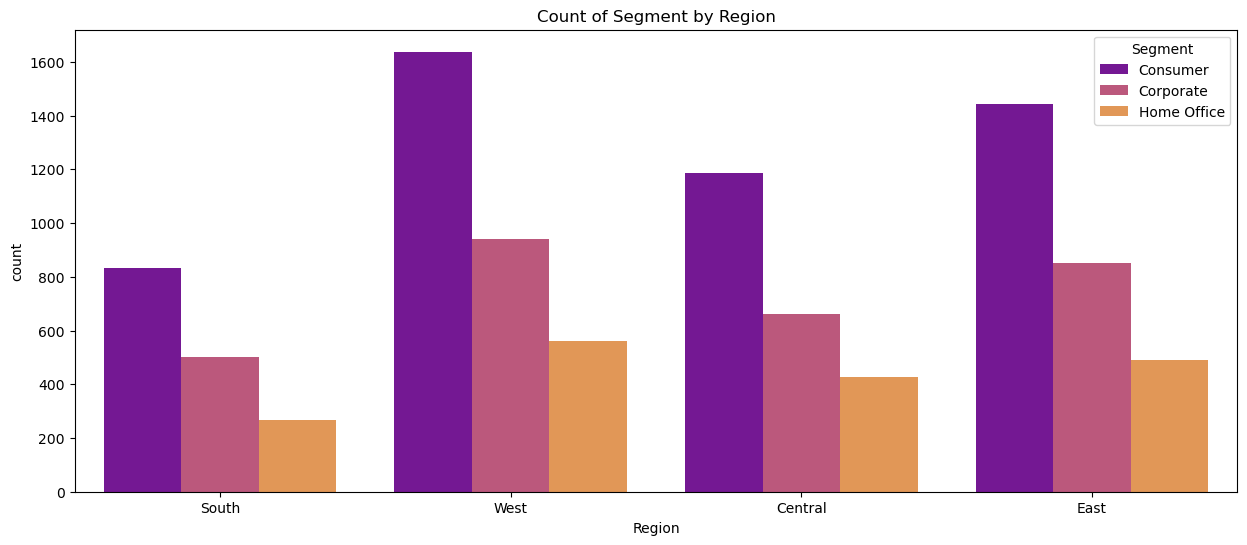

In [63]:
# Creating a visualisation

plt.figure(figsize=(15,6))
sns.countplot(data, x='Region', hue='Segment', palette = 'plasma') 
plt.title('Count of Segment by Region')
plt.show()

This graph is in conjunction with earlier graphs depicting sales by region and sales by segment.

# Category

In [64]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### Sales by Category

In [65]:
by_category = data.groupby('Category')

In [66]:
by_category['Sales'].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

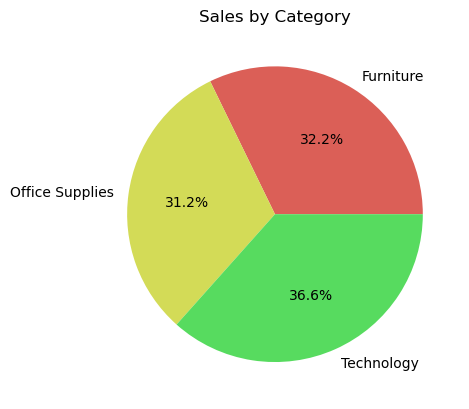

In [67]:
# Creating a visualisation
sales_by_category = by_category['Sales'].sum()

sns.set_palette("hls")
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%')
plt.title('Sales by Category')
plt.show()

The product categories are almost almost evenly distributed with technology taking the lead, closely followed by furnite and office supplies.

### Product Category by Segment

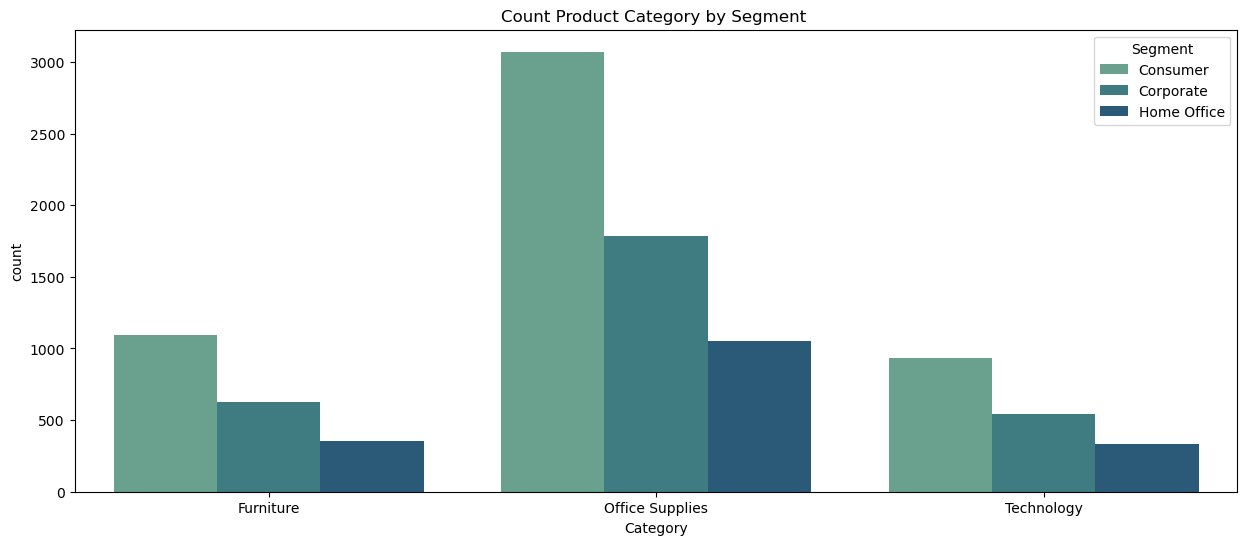

In [71]:
 # Creating a visualisation
    
plt.figure(figsize=(15,6))
sns.countplot(data, x='Category', hue='Segment', palette = 'crest') 
plt.title('Count Product Category by Segment ')
plt.show()

# Sub-Category

In [68]:
by_subcat= data.groupby(['Category', 'Sub-Category'])

### Sales by Sub-Category

In [69]:
by_subcat['Sales'].sum()

Category         Sub-Category
Furniture        Bookcases       113813.1987
                 Chairs          322822.7310
                 Furnishings      89212.0180
                 Tables          202810.6280
Office Supplies  Appliances      104618.4030
                 Art              26705.4100
                 Binders         200028.7850
                 Envelopes        16128.0460
                 Fasteners         3001.9600
                 Labels           12347.7260
                 Paper            76828.3040
                 Storage         219343.3920
                 Supplies         46420.3080
Technology       Accessories     164186.7000
                 Copiers         146248.0940
                 Machines        189238.6310
                 Phones          327782.4480
Name: Sales, dtype: float64

In [70]:
# Creating a visualisation
by_subcat = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

fig = px.bar(by_subcat, x='Category', y='Sales', color='Sub-Category', 
             title='Total Sales by Category and Sub-Category')
fig.show()


The top 2 subcategories from each category:
1. **Technology**: Phones (327.7k) and Machines (189.2k)
2. **Furniture**: Chairs (322.8k) and Tables (202.8k)
3. **Office Supplies**: Storage (219.3k) and Binders (200k)

# Product Name

### Best and Worst performing products

In [72]:
# Grouping by Product Name and calculating total sales

product_sales = data.groupby('Product Name')['Sales'].sum().reset_index()

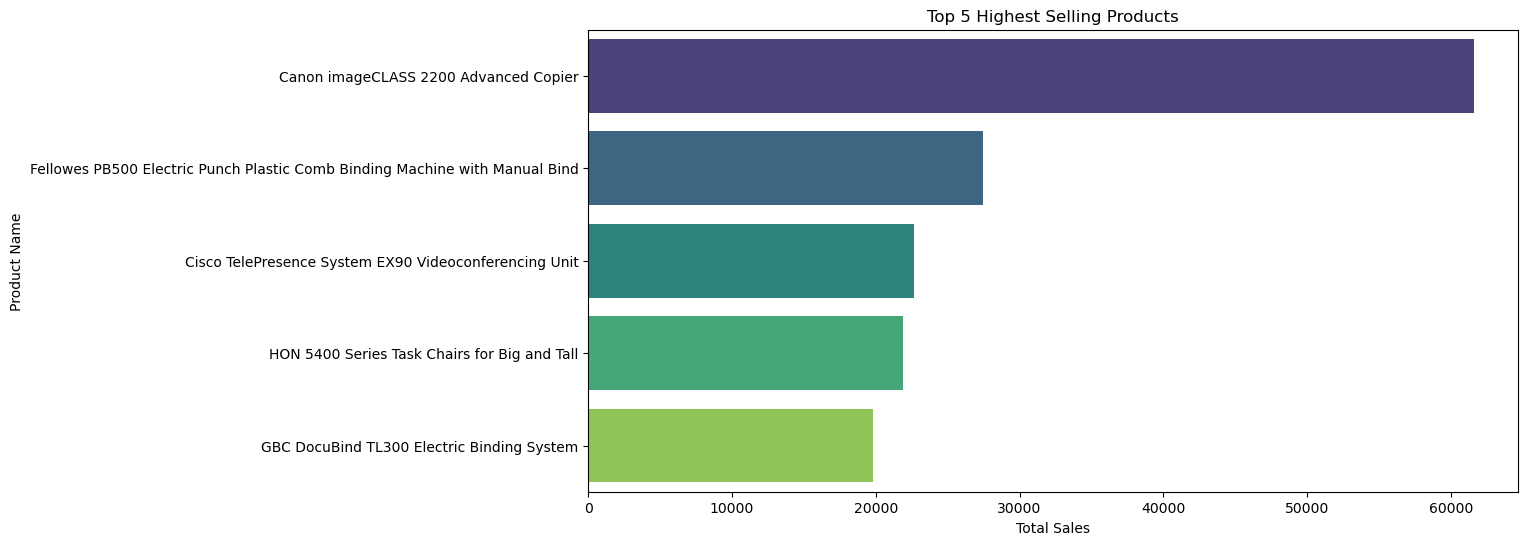

In [73]:
# Visualisation for Top 5 Highest Selling Products

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=product_sales.sort_values(by='Sales', ascending=False).head(), 
            palette='viridis')
plt.title('Top 5 Highest Selling Products')
plt.xlabel('Total Sales')
plt.show()

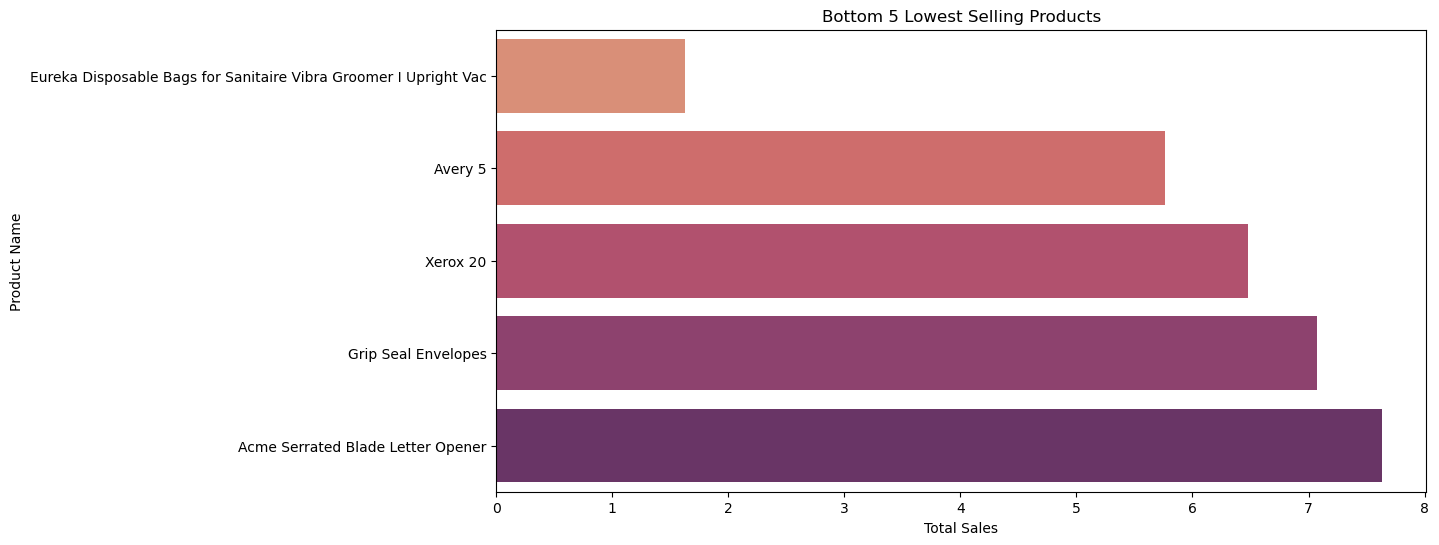

In [74]:
# Visualisation for Bottom 5 Lowest Selling Products

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=product_sales.sort_values(by='Sales', ascending=True).head(), 
            palette='flare')
plt.title('Bottom 5 Lowest Selling Products')
plt.xlabel('Total Sales')
plt.show()